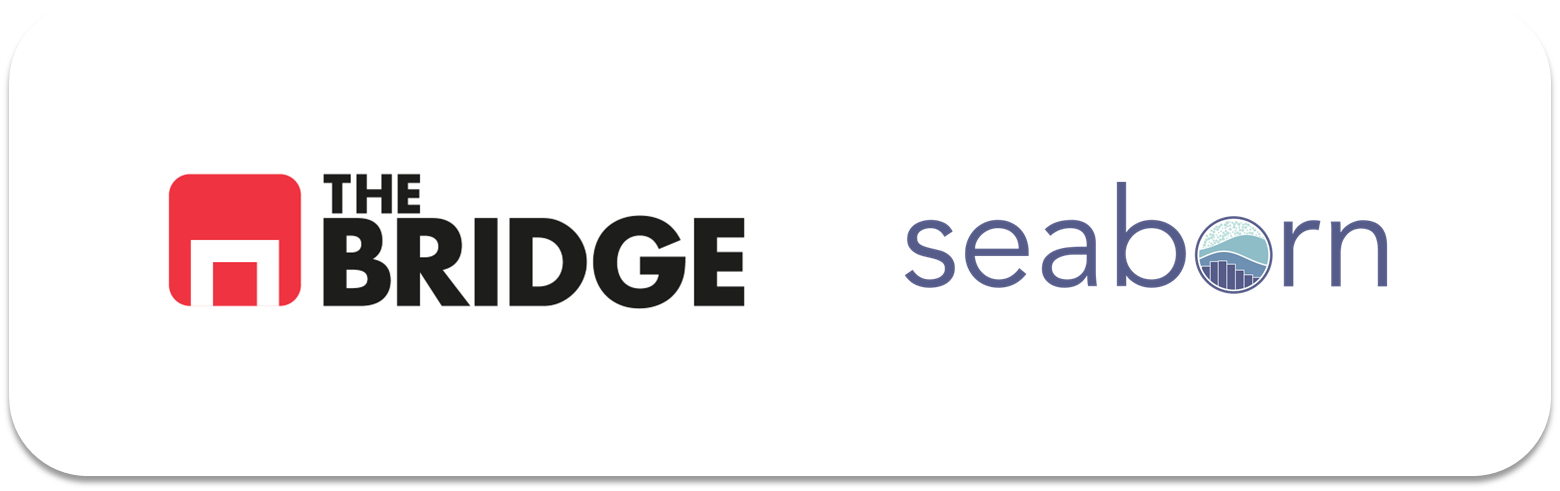

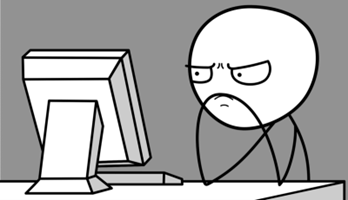

Para ejercitarte y afianzar lo aprendido sobre visualización de datos de variables columnas a la vez, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


### Ejercicio 1

Carga los siguientes datasets que necesitarás para poder hacer el resto de ejercicios:
1. Titanic, "./data/titanic.csv"
2. Viajes, "./data/dataset_viajes_jun23"

In [3]:
df1= pd.read_csv("./data/titanic.csv")
df2= pd.read_csv("./data/dataset_viajes_jun23.csv")

### Ejercicio 2

Crea una función que tenga como argumentos un dataframe, el nombre de una columa categórica, el nombre de otra columna categórica y que haga lo siguiente:
1. Dibuje una combinación de gráficas con las frecuencias absolutas de cada columna categórica y una figura con el catplot de las dos columnas usando la segunda como valor para el argumento col. Utiliza countplot para las frecuencias y un subplots de 1 fila y dos columnas, añade una figura con catplot para la comparación. 
2. Devuelva la tabla de contigencia de las dos columnas.


In [4]:

def plot_categoricas_y_contingencia(df, col1, col2):
    """
    Dibuja countplots de dos columnas categóricas y un catplot comparativo.
    Devuelve la tabla de contingencia entre ambas columnas.
    
    Parámetros:
        df   : DataFrame
        col1 : nombre de columna categórica
        col2 : nombre de otra columna categórica
    """

    # ==== 1. FIGURA CON DOS COUNTPLOTS ====
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # Countplot columna 1
    sns.countplot(x=col1, data=df, ax=axs[0])
    axs[0].set_title(f"Frecuencias absolutas de {col1}")
    axs[0].set_xlabel(col1)
    axs[0].set_ylabel("Frecuencia")
    axs[0].tick_params(axis='x', rotation=45)

    # Countplot columna 2
    sns.countplot(x=col2, data=df, ax=axs[1])
    axs[1].set_title(f"Frecuencias absolutas de {col2}")
    axs[1].set_xlabel(col2)
    axs[1].set_ylabel("Frecuencia")
    axs[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    # ==== 2. CATPLOT COMPARATIVO ====
    sns.catplot(data=df, kind="count", x=col1, col=col2, height=5, aspect=1.2)
    plt.suptitle(f"Comparación entre {col1} y {col2}", y=1.03)
    plt.show()

    # ==== 3. TABLA DE CONTINGENCIA ====
    tabla = pd.crosstab(df[col1], df[col2])

    return tabla


### Ejercicio 3

Aplicalo para comparar por un lado "alive" y "who" y "alive" y "class" del dataset del titanic.

#### Alive y who

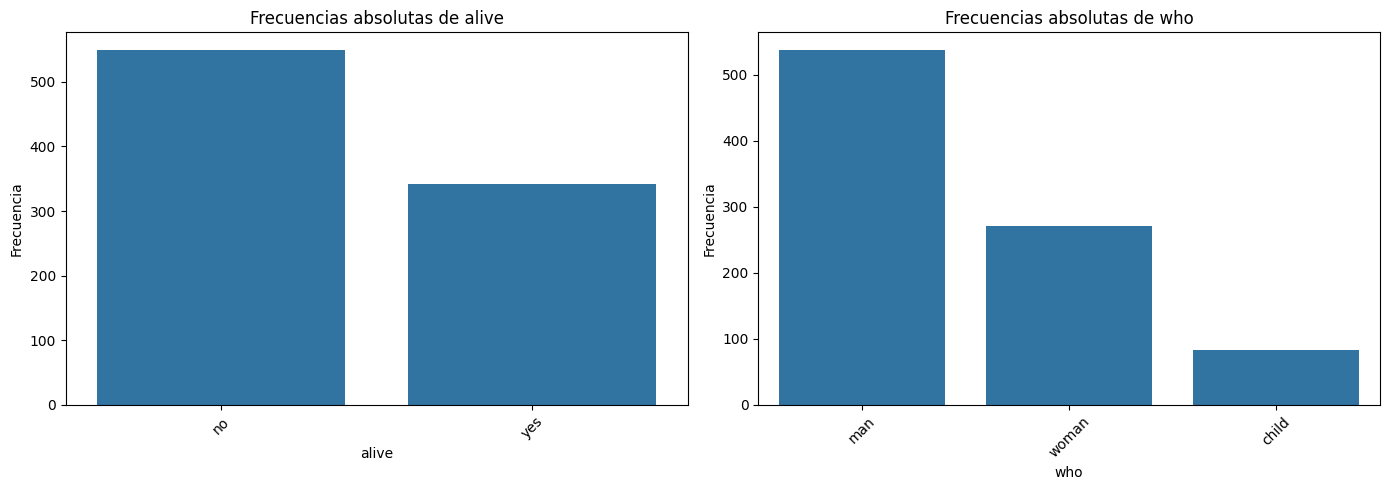

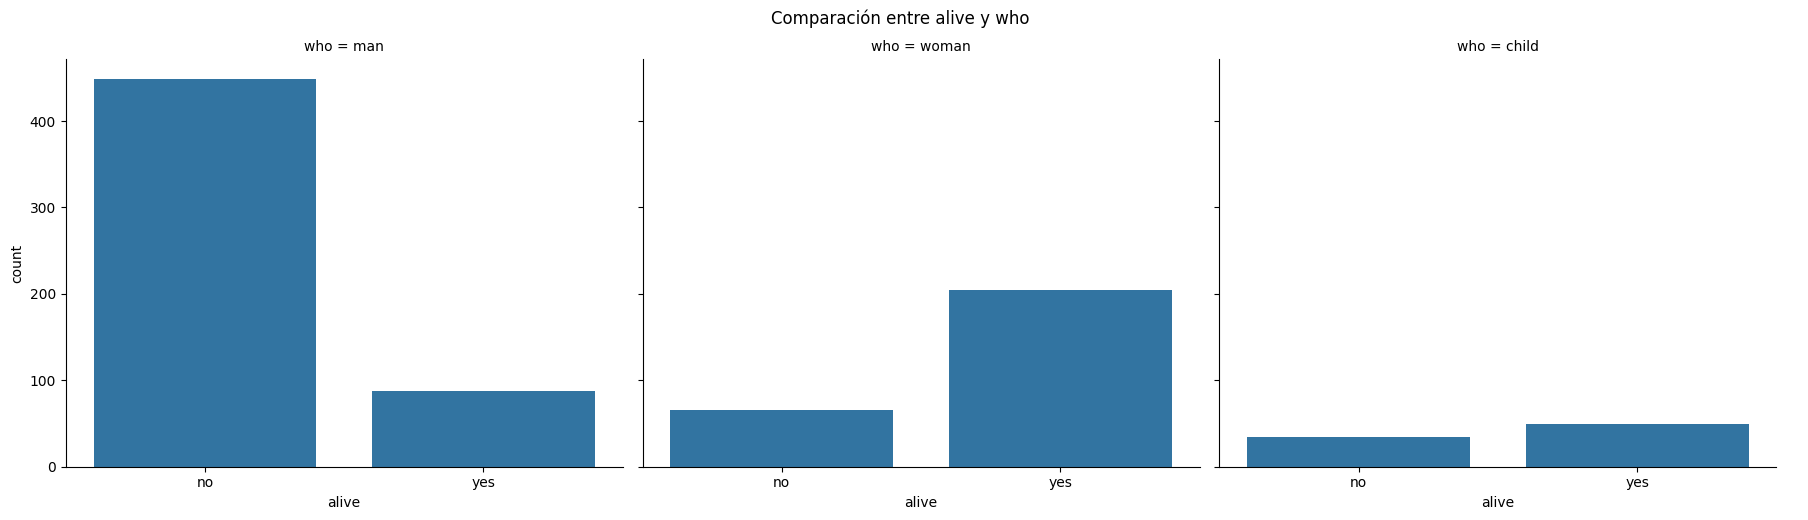

who,child,man,woman
alive,,,
no,34,449,66
yes,49,88,205


In [5]:
plot_categoricas_y_contingencia(df1, "alive", "who")

#### Alive y Class

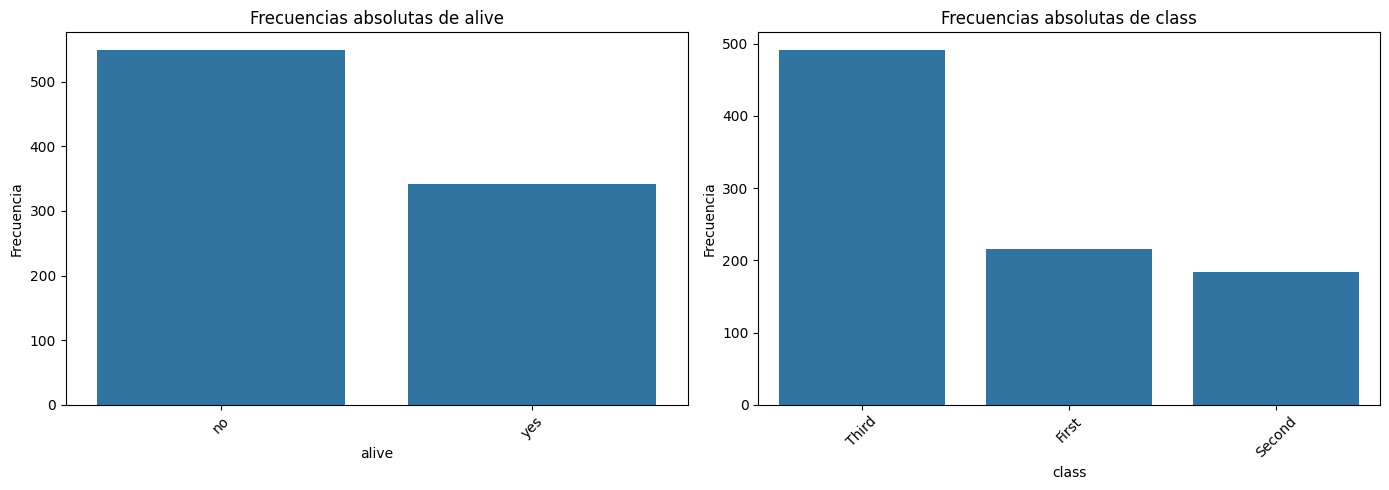

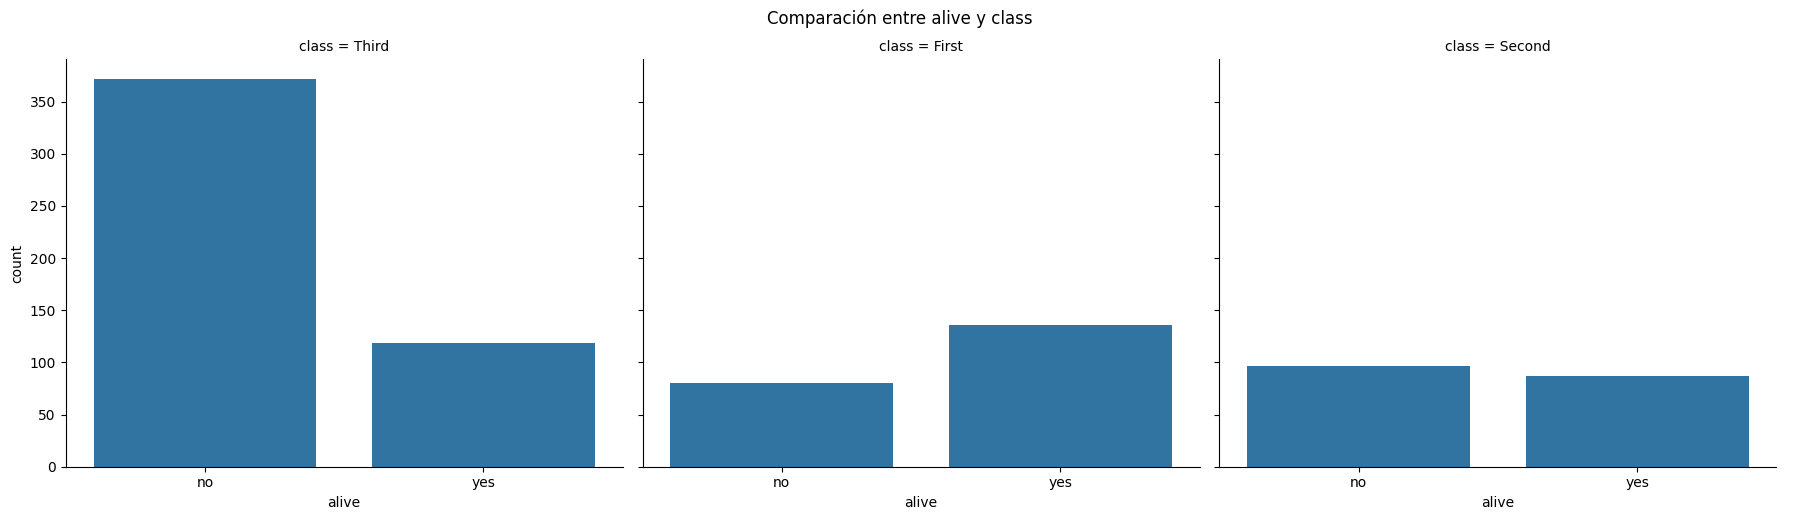

class,First,Second,Third
alive,,,
no,80,97,372
yes,136,87,119


In [6]:
plot_categoricas_y_contingencia(df1, "alive", "class")

### Ejercicio 4

Crea una función que compare ahora una variable categórica y otra numérica. Para ello, se aconseja reutilizar código de las funciones que viste en el grupo anterior de ejercicios para pintar histogramas, crea una función que haga lo siguiente:
1. Admita tres parámetros o argumentos: Un dataframe, el nombre de una columna categórica del mismo, el nombre de una columna numérica del mismo.
2. Cree una matriz de gráficos, tantas como valores de la variable categórica, con un máximo de tres columnas por fila y todas las filas que necesite.
3. Asigne a cada gráfica el histograma de la variable numérica pero sólo para las filas que tengan el valor que corresponda de la variable categórica (así si el primer valor de la categórica es Val1 y la variable numérica se llama Num1, en la primera gráfica estará el histograma de Num1 sólo para las filas que tengan Val1)
4. Añada el título "Histograma de {variable numerica} para el valor {valor correspondiente de la categórica} a cada gráfica.

In [7]:

import math

def plot_hist_by_category(df, col_cat, col_num):
    """
    Dibuja histogramas de la columna numérica filtrada por cada valor
    único de la columna categórica.
    
    Parámetros:
        df      : DataFrame
        col_cat : nombre de columna categórica
        col_num : nombre de columna numérica
    """

    # Valores únicos de la variable categórica
    categorias = df[col_cat].dropna().unique()
    n = len(categorias)

    # Configuración de matriz: máximo 3 columnas
    cols = 3
    rows = math.ceil(n / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(18, 4 * rows))
    axes = axes.ravel()  # para iterar fácilmente

    for i, categoria in enumerate(categorias):
        # Filtramos el dataframe por la categoría correspondiente
        df_filtrado = df[df[col_cat] == categoria][col_num].dropna()

        axes[i].hist(df_filtrado, bins=20, color="steelblue", alpha=0.7)
        axes[i].set_title(f"Histograma de {col_num} para el valor {categoria}")
        axes[i].set_xlabel(col_num)
        axes[i].set_ylabel("Frecuencia")

    # Ocultamos ejes vacíos si la matriz no es exacta
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()


### Ejercicio 5

Aplica la función anterior para ver los histogramas de "ingresos" y "consumo_kg" por compañía aérea del dataset de viajes. ¿Qué argumentos añadirías a la función para poder generar mejores visualizaciones?

#### Aircompany e Ingresos

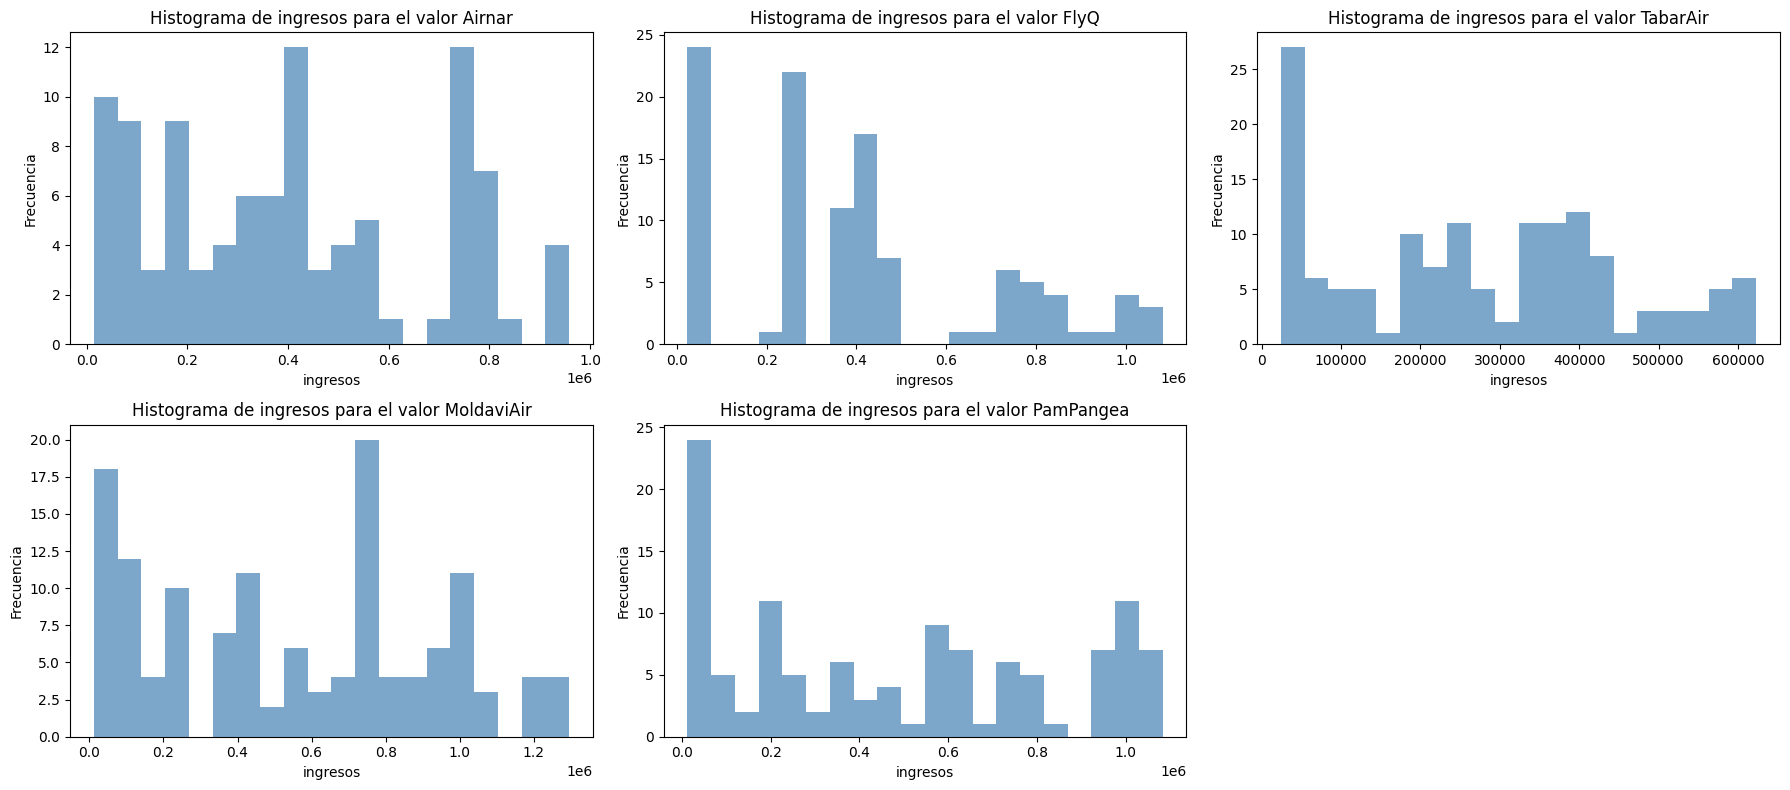

In [9]:
plot_hist_by_category(df2, "aircompany", "ingresos")

#### Aircompany y Consumo_kg

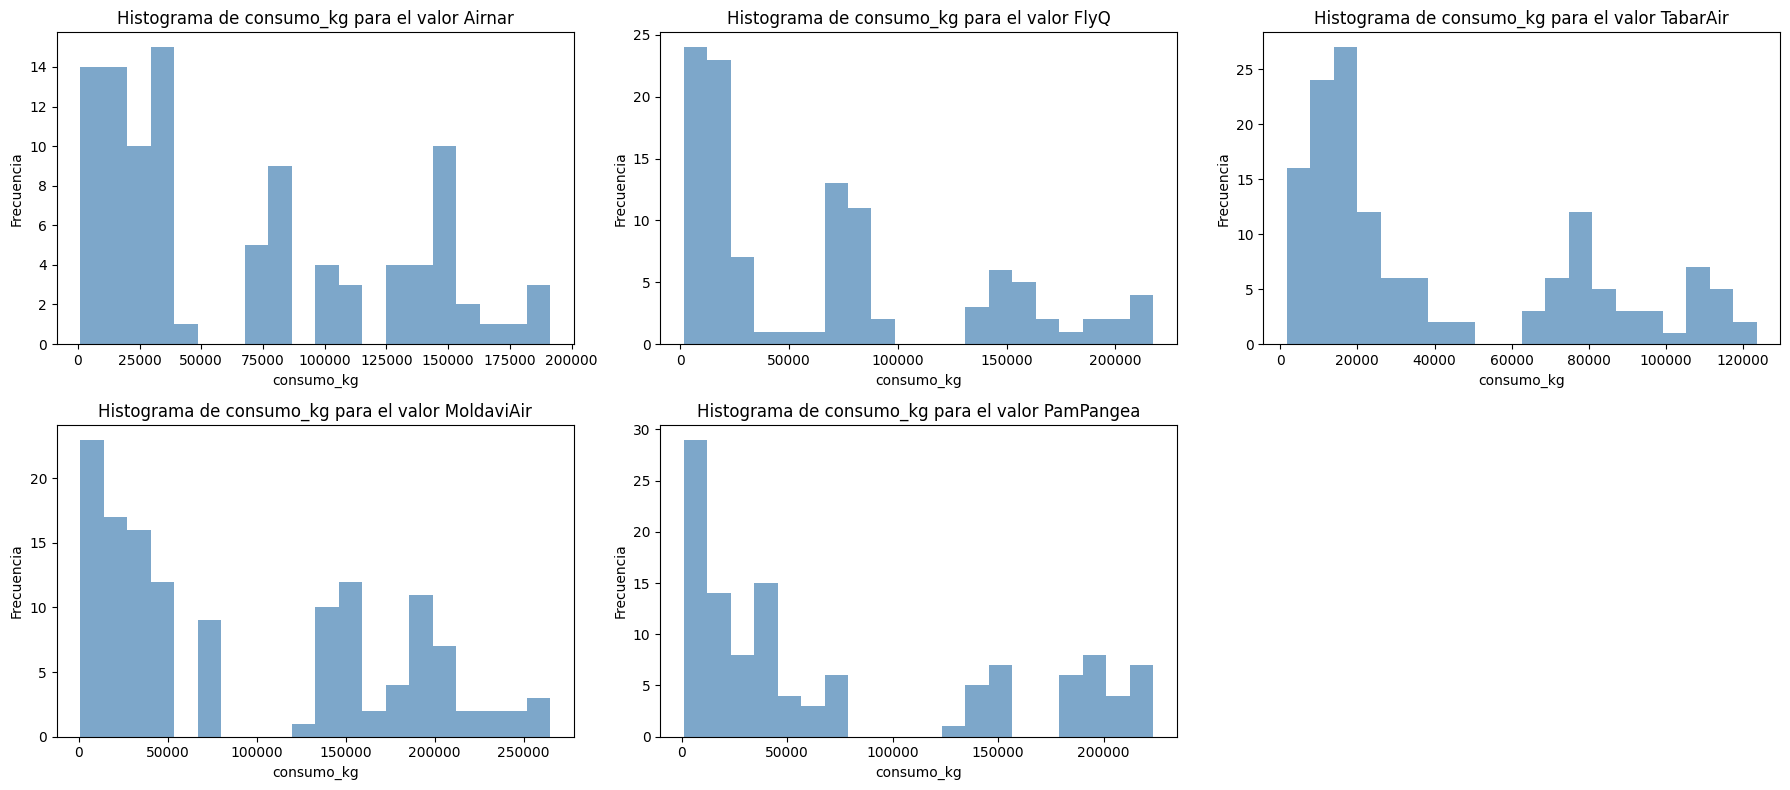

In [10]:
plot_hist_by_category(df2, "aircompany", "consumo_kg")

### Ejercicio 6

Crea una función para pintar diagramas de dispersion que tenga cinco argumentos:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos.

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn que uses. [Nota: como en todos los ejercicios anteriores, debes usar Seaborn para pintar]

In [11]:


def scatter_plot(df, col_x, col_y, col_cat=None, size=50):
    """
    Pinta un diagrama de dispersión entre dos columnas numéricas,
    coloreando por la columna categórica si se especifica.
    
    Parámetros:
        df      : DataFrame
        col_x   : columna numérica (eje X)
        col_y   : columna numérica (eje Y)
        col_cat : columna categórica (opcional)
        size    : tamaño de los puntos
    """

    plt.figure(figsize=(8, 6))

    if col_cat is None:
        # Sin categoría → sin hue
        sns.scatterplot(data=df, x=col_x, y=col_y, s=size)
    else:
        # Con categoría → con hue
        sns.scatterplot(data=df, x=col_x, y=col_y, hue=col_cat, s=size)

    plt.title(f"Diagrama de dispersión: {col_x} vs {col_y}", fontsize=14)
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.tight_layout()
    plt.show()


### Ejercicio 7

Usa la función del ejercicio anterior para pintar la comparativa entre ingresos, consumo_kg y compañía aérea. ¿Si quisieras usarla como visualización que quitarías, añadirías o remarcarías?

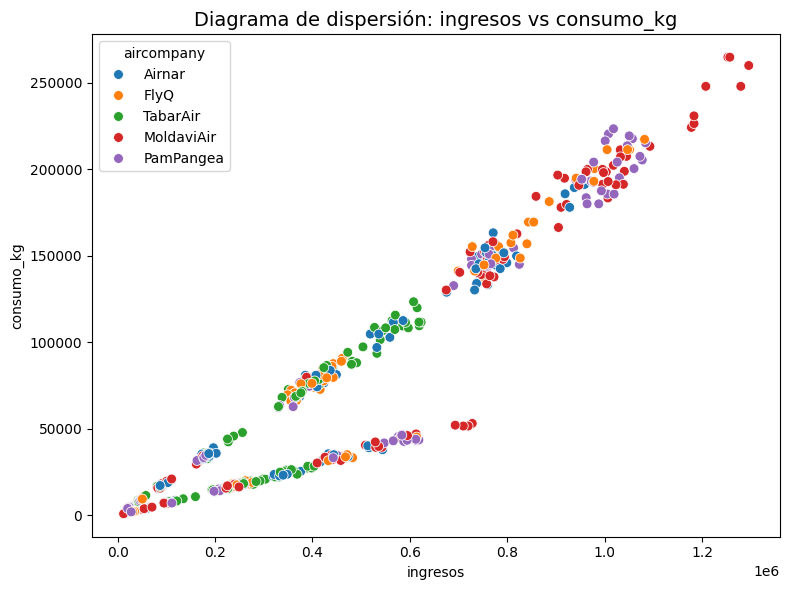

In [12]:
scatter_plot(df2, "ingresos", "consumo_kg", "aircompany")

### Ejercicio 8

Usa la función del ejercicio 6 para pintar la comparativa entre distancia, duración e ingresos. ¿Si quisieras usarla como visualización que quitarías, añadírías o remarcarías?

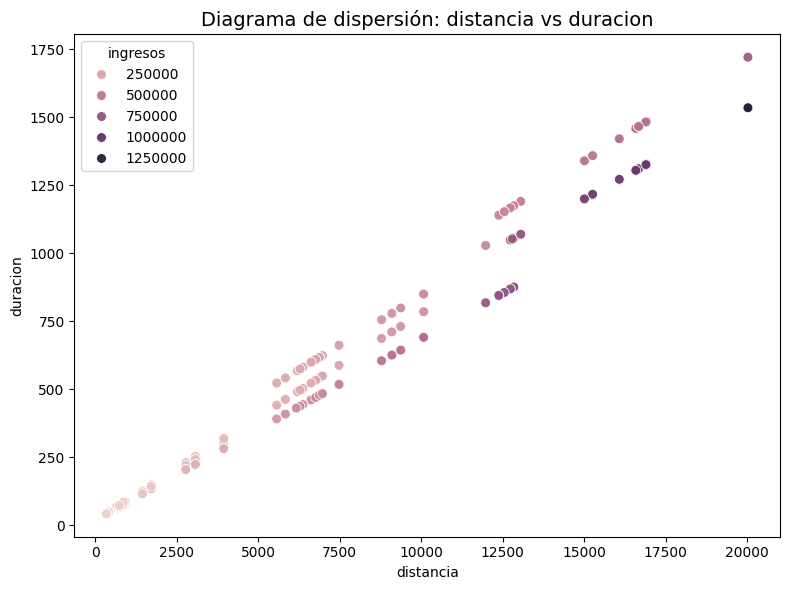

In [14]:
scatter_plot(df2, "distancia", "duracion", "ingresos")